## 决策树的问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [4]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

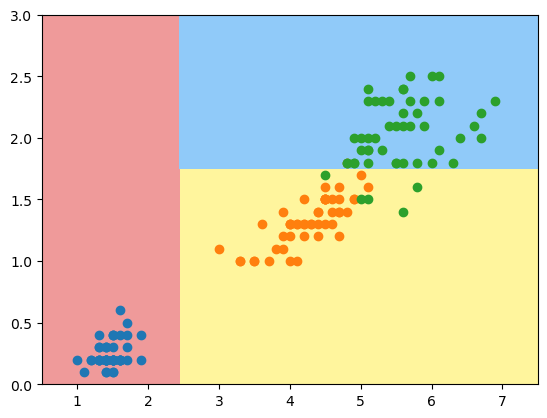

In [5]:
plot_decision_boundary(tree_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [6]:
X_new = np.delete(X, 106, axis=0)
y_new = np.delete(y, 106)

In [7]:
X_new.shape

(149, 2)

In [8]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
tree_clf2.fit(X_new, y_new)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

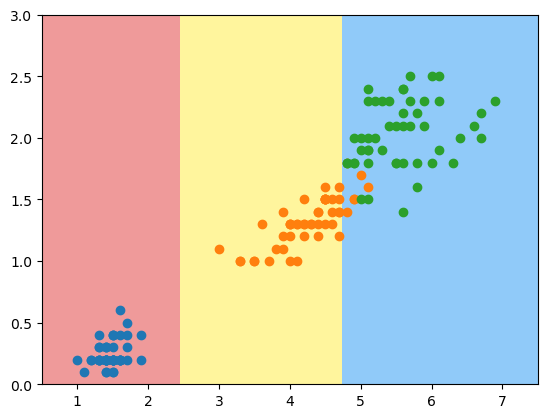

In [9]:
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X_new[y_new==0,0], X_new[y_new==0,1])
plt.scatter(X_new[y_new==1,0], X_new[y_new==1,1])
plt.scatter(X_new[y_new==2,0], X_new[y_new==2,1])
plt.show()